# Task 2.2

If the simulation starts in the center (the grey shaded box), and when it reaches the steady-state value for the number of cells, the tumor moves to any one of the other eight cells of the grid. The choice of the cell to move to is random. When the growth moves to a second cell, your initial population of tumor cells is reset to the initial conditions, and you carry on stimulating the growth till a steady state is reached for two cells of the grid. Now the cell growth has to move another cell in the grid, and your choice of locations is now seven

Plot the movement of the tumor cell growth through the grid. A suggestion is to start with a small grid (say 100X 100). While you are doing this, consider the issues associated with the numerical strategy you are employing. If the numerical methods are changed, what will be the change in the complexity of the simulation?

In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt



In [17]:

# Simulates a gompertz growth model within a sigular cell 
def gompertz_growth(N0, k, M, t_max, h):
    t = np.arange(0, t_max, h)
    N = np.zeros_like(t)
    N[0] = N0
    
    for i in range(1, len(t)):
        N[i] = N[i-1] + h * k * N[i-1] * np.log(M / N[i-1])
    
    return t, N


In [18]:

def time_to_reach_fraction(N, t, fraction):
    target = fraction * N[-1]
    for i in range(len(N)):
        if N[i] >= target:
            return t[i]
    return None


In [19]:

# Parameters
k = 0.006
N0 = 10**9
h = 0.001
t_max = 1500
fractions = [0.66]
M = 10**13


Time to reach 66.0% of M=10000000000000: 515.975


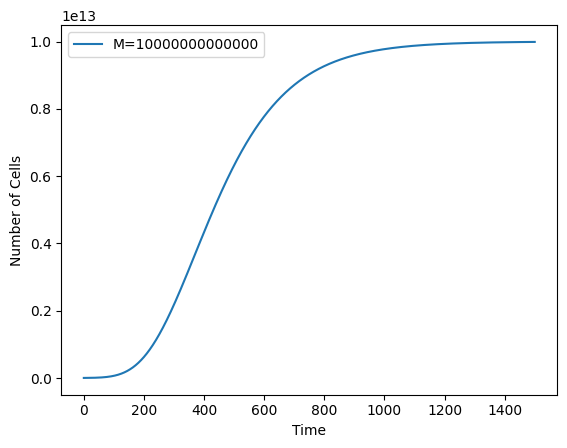

In [20]:


t, N = gompertz_growth(N0, k, M, t_max, h)

plt.plot(t, N, label=f"M={M}")
for fraction in fractions:
    time_to_fraction = time_to_reach_fraction(N, t, fraction)
    print(f"Time to reach {fraction*100}% of M={M}: {time_to_fraction}")

plt.xlabel('Time')
plt.ylabel('Number of Cells')
plt.legend()
plt.show()


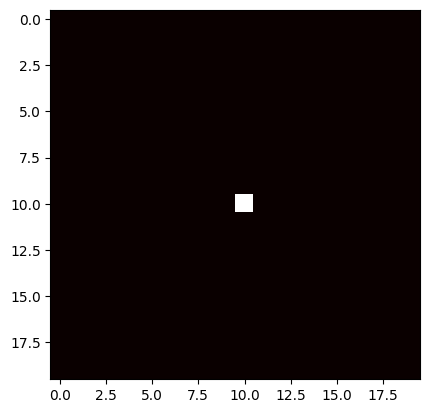

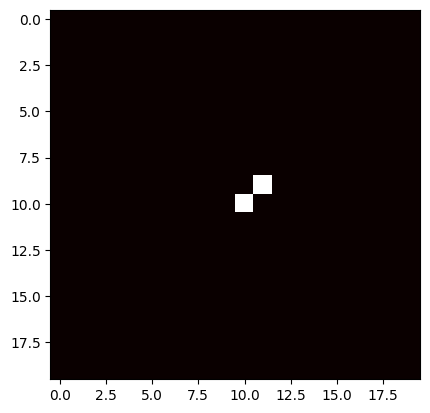

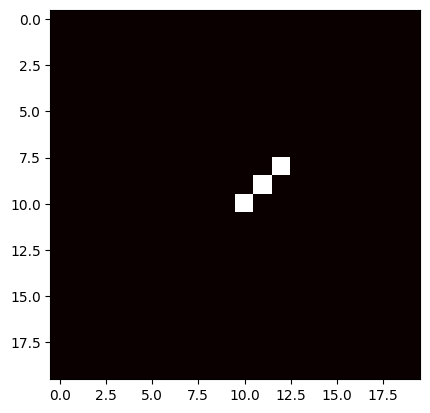

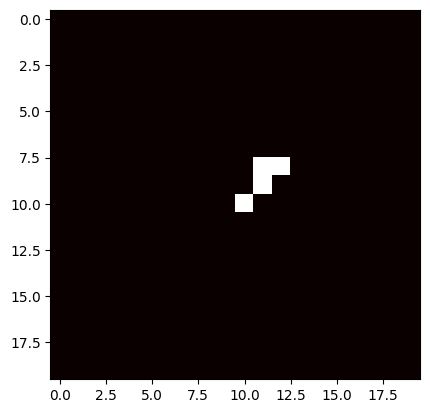

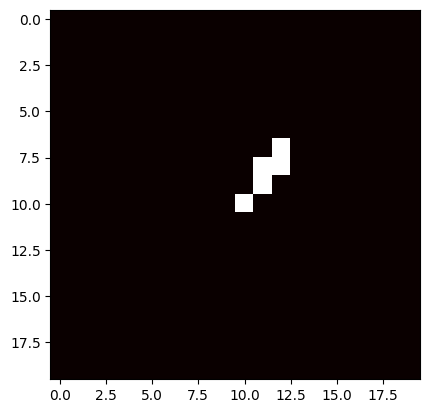

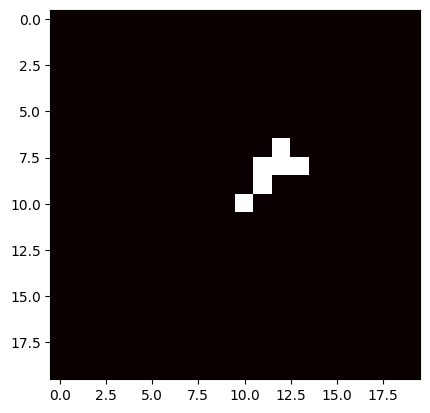

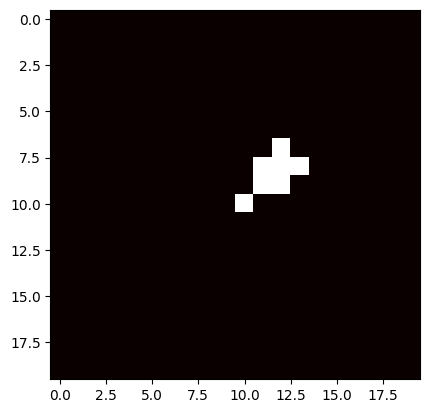

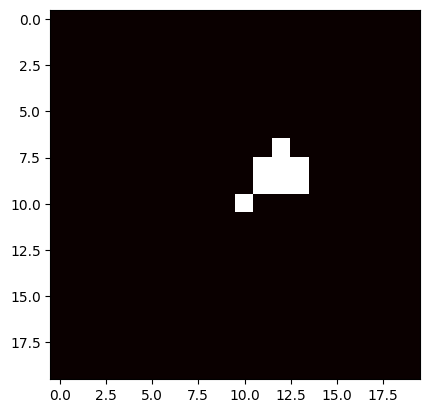

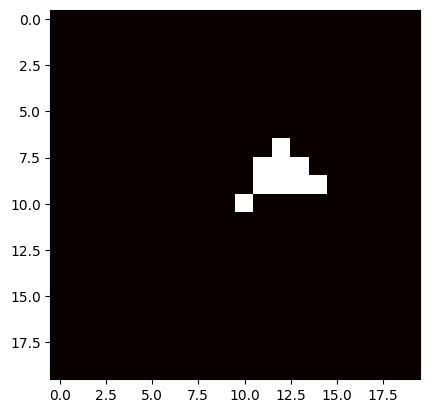

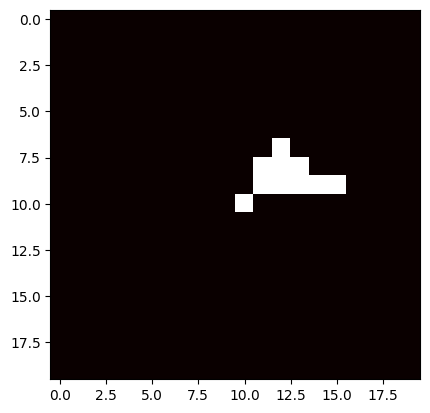

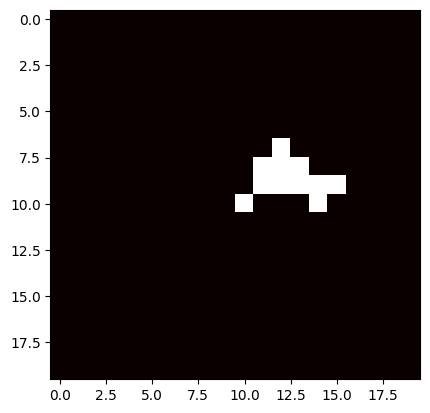

In [ ]:


# Parameters
grid_size = 20
initial_cells = [(grid_size//2, grid_size//2)]
k = 0.006
N0 = 10**9
M = 10**13
h = 0.001

# Initialize grid
grid = np.zeros((grid_size, grid_size))
unvisited_cells = set((i, j) for i in range(grid_size) for j in range(grid_size))
unvisited_cells.discard((grid_size//2, grid_size//2))

def simulate_grid_growth(grid, initial_cells, k, N0, M, h):
    visited_cells = initial_cells[:]
    
    while unvisited_cells:
        current_cell = visited_cells[-1]
        t, N = gompertz_growth(N0, k, M, t_max, h)
        
        grid[current_cell] = N[-1]
        
        # Plot grid
        plt.imshow(grid, cmap='hot', interpolation='nearest')
        plt.show()
        
        # Move to a random neighboring cell
        neighbors = [(current_cell[0] + i, current_cell[1] + j) for i in [-1, 0, 1] for j in [-1, 0, 1] if (i, j) != (0, 0)]
        valid_moves = [cell for cell in neighbors if cell in unvisited_cells]
        
        if not valid_moves:
            break
        
        next_cell = random.choice(valid_moves)
        unvisited_cells.discard(next_cell)
        visited_cells.append(next_cell)
        
        # Reset initial conditions for new cell or translate full growth
        # If needed, reset N0 and M or use the fully grown number

    return grid

# Run the simulation
grid = simulate_grid_growth(grid, initial_cells, k, N0, M, h)


# Task 2.1